<center> <h1>Métodos Avanzados de Estadística 2023-24</h1> </center>

<center> <h2>Técnicas de reducción de la varianza</h2> </center>

<center> <h5>Pablo Aguilera Onieva</h5> </center>

**IMPORTANTE**: *El presente documento está conformado por extractos de los trabajos individuales que ha hecho cada componente del equipo y ha sido ajustado para no superar el máximo de 20 páginas especificado en el enunciado de la práctica. Las versiones completas se encuentran en los demás cuadernos de Jupyter existentes en el directorio principal con los nombres de cada autor.*

---

# Introducción

La reducción de la varianza desempeña un papel fundamental para asegurar la consistencia de las estimaciones estadísticas.

La reducción de la varianza es una técnica, especialmente empleada en el ámbito de los métodos de Monte Carlo, para aumentar la precisión de las estimaciones obtenidas en una simulación. Cada variable aleatoria de interés obtenida como salida de la simulación está asociada a una varianza que limita la precisión de los resultados. Gracias a las técnicas de reducción de la varianza se consigue que una simulación sea estadísticamente eficiente, o lo que es lo mismo, que tenga una buena precisión e intervalos de confianza lo suficientemente pequeños para la variable aleatoria de interés.

Este documento se propone explorar algunas técnicas de reducción de varianza, centrándose específicamente en su aplicación en el contexto de estimadores estadísticos. El objetivo es proporcionar una visión detallada de estrategias diseñadas para mitigar la variabilidad inherente a los modelos, examinando cómo estas técnicas afectan directamente a la precisión y la robustez de los estimadores.

En el primer apartado, se examinará el uso de variables de control. Estas variables, cuando se seleccionan cuidadosamente, buscan minimizar la variabilidad al actuar como factores compensatorios en el proceso de estimación. Se explorará cómo la inclusión estratégica de variables de control puede transformar la gestión de factores de confusión, mejorando la validez de los resultados y proporcionando una perspectiva más clara en la inferencia estadística.

En el segundo apartado, se abordará el empleo de variables antitéticas. La inclusión de variables opuestas en el proceso de muestreo se presenta como una herramienta para contrarrestar la variabilidad, buscando obtener estimaciones más estables y fiables. Se analizará en detalle cómo esta técnica puede ser beneficiosa, especialmente en el contexto de modelos estadísticos avanzados.

El tercer apartado se centrará en el muestreo estratificado, una táctica que busca mejorar la precisión de los estimadores al dividir la población en estratos lo más homogéneos posible. Se explorará cómo esta metodología, al considerar las diferencias entre subgrupos dentro de una misma población, puede llevar a estimaciones más precisas y representativas.

Este documento tiene como propósito ser una guía práctica y accesible, desglosando conceptos complejos en estrategias aplicables. Al explorar las técnicas de reducción de varianza en el ámbito de los estimadores estadísticos, se busca desentrañar las complejidades del análisis estadístico y proporcionar herramientas concretas para mejorar la calidad y fiabilidad de las inferencias, abordando así los desafíos inherentes al empleo de métodos avanzados en Estadística.

Para cada una de las técnicas presentadas, se incluirá una breve introducción al método, así como código de ejemplo con una implementación de éste sobre un conjunto de datos. Finalmente, se incluirá una sección con referencias bibliográficas y enlaces a recursos online que se han empleado como fuente para la elaboración de este documento.

---

# Variables de control

In [ ]:
library("dplyr")
library("ggplot2")
library("DescTools")
library("SamplingUtil")
set.seed(225)

Esta técnica es aplicada en los métodos de Monte Carlo para reducir la varianza y mejorar la precisión del parámetro a estimar, basándose en aprovecha la información relacionada con los errores en las estimaciones de cantidades conocidas para disminuir el error en la estimación de cantidades desconocidas. Una característica distintiva de las variables de control es su capacidad para garantizar que la variación siempre sea reducida (o igualada), pero nunca aumentada.

Aunque es más compleja que la técnica de variables antitéticas, las variables de control se destacan por su eficacia, la cual busca aprovechar tanto las covarianzas positivas como las negativas entre dos variables. La estrategia consiste en el uso de una variable $Y$ con el valor del parámetro a estimar conocido para controlar la variable $X$, cuyo valor del parámetro a estimar es desconocida. La clave está en lograr una correlación entre ambas variables, lo que permite controlar de manera efectiva la variabilidad de la estimación de la cantidad desconocida. Entre más correlación exista entre las variables $X$ e $Y$, mayor será la reducción de la varianza.


## Demostración matemática:

Por medio de una simulación vamos a estimar la media emperica $\theta = E[X]$, donde $X$ es la salida de la simulación.
Luego se explora otra salida de la simulación, la cual se conocemos su valor y la denominaremos $Y$.

Utilizaremos ambas salidas, una que no se conoce $\theta$ y otra que si se conoce $E[Y]= \mu$ y combinamos estas dos variables de la siguiente manera, siendo $Z$ la versión "controlada" de $X$:

$$Z = X + c(Y- \mu)$$

de modo que, en el caso de que el valor de $(Y-\mu)$ sea 0, la esperanza de $Z$ sea igual a la esperanza de $X$ ($E[Z]=E[X]$).
La idea es "diseñar" el parámetro $c$, de modo que la varianza de $Z$ sea menor que la varianza de $X$ y estimar ahora el valor de $\theta$ en función de $Z$, ya que tienen la misma media.

Entonces, la varianza de $Z$ es:

$$Var(Z)=Var(X+cY)=Var(X) + c^{2}Var(Y)+2cCov(X,Y)$$

donde finalmente debemos encontrar un valor de $c$ tal que la $Var(Z)$ sea la menor posible, es decir que sea un mínimo. Para encontrar el mínimo en un polinomio en $c$ de grado dos, debemos derivar en función de $c$ e igualar a cero:


- Primera derivada:

$$2c Var(Y) + 2Cov(X,Y)$$

- Igualar a cero y despejar c:
$$c^{*}=-\frac{Cov(X,Y)}{Var(Y)}$$

Sea $c^{*}$ el valor que hace que la Var(Z) sea la más pequeña.  

Para confirmar que efectivamente encontramos un mínimo, se calcula la segunda derivada:

- Segunda derivada:

$$2 Var(Y)>0$$

Como $2 Var(Y)$ es un valor positivo, se demuestra que es una parábola convexa, confirmado que es un mínimo.  


Ahora usaremos $Z^{*}$, que es igual que $Z$ pero reemplazando el $c$ por el $c^{*}$:

$$Z^{*}=X-\frac{Cov(X,Y)}{Var(Y)}(Y-\mu)$$

Si calculamos la varianza de $Z^{*}$:

$$Var(Z^{*})=Var(X) - \frac{Cov(X,Y)^{2}}{Var(Y)}\leq Var(X)$$

podemos ver que la varianza de $Z^{*}$ es la varianza de $X$ menos un valor **positivo**, por tanto, podemos demostrar que la varianza de $Z^{*}$ es menor o igual que la varianza de $X$. *(Las varianzas serán iguales cuando las variables $X$ e $Y$ sean independientes).*

Otra manera de expresar la varianza de $Z^{*}$ es: $Var(Z^{*})=Var(X)(1-\rho^{2}_{X,Y})$, donde $\rho^{2}_{X,Y}$ es el coeficiente de correlación entre $X$ e $Y$. Mientras mayor sea el valor de $|\rho^{2}_{X,Y}|$ mayor será la reducción de la varianza, suponiendo una reducción del $100\rho^{2}_{X,Y}\%$.

En la práctica, los valores de $Cov(X,Y)$ y $Var(Y)$ suelen ser desconocidos. Por lo tanto, como es común en estos casos, utilizaremos la muestra generada para calcular estos valores mediante simulación. Así, obtendremos $\widehat{Cov}(X,Y)$ y $\widehat{Var}(Y)$:

$$\widehat{Cov}(X,Y)=\frac{1}{n-1}\sum_{r=1}^{R}(X_{r}-\bar{X})(Y_{r}-\bar{Y})$$

$$\widehat{Var}(Y)=\frac{1}{n-1}\sum_{r=1}^{R}(Y_{r}-\bar{Y})^{2}$$

El problema con $\widehat{Cov}(X,Y)$ y $\widehat{Var}(Y)$ es que son complicadas de calcular. Para resolver esto, se puede estimar el valor de $c^{*}$ realizando un ajuste lineal de $X$ sobre $Y$, el cual se basa en el uso de la Regresión Lineal y los estimadores de mínimos cuadrados de $a$ y $b$:

- Regresión lineal:
$$X=aY+b+\epsilon \qquad \epsilon \sim N(0,\sigma^{2})$$

- Estimador de $a$:
$$\hat{a} = \frac{\sum_{r=1}^{R}(X_{r}-\bar{X})(Y_{r}-\bar{Y})}{\sum_{r=1}^{R}(Y_{r}-\bar{Y})^{2}}$$

- Estimador de $b$:
$$\hat{b}= \bar{X}-\hat{a}\bar{Y}$$

Se puede observar que $c^{*}=-\hat{a}$, por lo que podemos decir que la técnica de variables de control tiene relación con la regresión lineal. Además si reemplazamos $Y$ por $\mu$ (que es el valor esperado) en el modelo y calculamos la expresión de $\hat{b}+\hat{a}\mu$ se puede observar que obtenemos $\hat\theta$:

\begin{eqnarray}
\hat{b}+\hat{a}\mu =& \bar{X}-\hat{a}\bar{Y}+\hat{a}\mu\\
                   =& \bar{X}-\hat{a}(\bar{Y}-\mu)\\
                   =& \bar{X}+ c^{*}(\bar{Y}-\mu)\\
                   =& \hat\theta
\end{eqnarray}


En resumen, la estimación de la variable de control que estamos buscando $\hat\theta$, se puede obtener utilizando el modelo lineal que hemos estimado evaluando en $\mu$. Por tanto, el procedimiento es realmente sencillo:
1. Ejecutar una simulación para obetner las muestras de X e Y.
2. Calcular la regresión lineal y obtener la estimación $\hat{a}$ y $\hat{b}$ del coeficiente y la intersección del modelo lineal.
3. Calcular la cantidad $\hat{b}+\hat{a}\mu$ para obtener la estimación $\hat\theta$.

## Demostración experimental

### Utilizando Regresión lineal

Vamos a calcular $I = \int_{0}^{1} e^{x}dx$ con el método de la regresión lineal, es decir, calcularemos el $\hat{a}$ y $\hat{b}$ para obtener el valor de la estimación.

Tenemos los siguientes datos teóricos:

  - $X=e^{U} \rightarrow$ Función a integrar

  - $Y=U\rightarrow$ Variable de control

  - $E[Y]=1/2$

  - $Var(Y)=1/12$

  - $Cov(X,Y)=(3-e)/2 \approx 0.14$

  - $c^{*}=-\frac{Cov(X,Y)}{Var(Y)} = -6(3-e) \approx -1.69$


Ahora, por medio de simulaciones comprobaremos el valores estimados de $c^{*}$ y calcularemos la estimación de la integral y su varianza:


#### Simulación de una función exponencial



Generaremos una simulación de una función exponencial de números aleatorios de distribución uniforme en un intervalo [0,1]. Luego calcularemos la media para obtener el valor espero de la estimación y su varianza:

In [ ]:
# Número de simulaciones
R <- 5000

# Función a integrar
f <- function(x) exp(x)

In [ ]:
# Simulación
simulaciones <- replicate(R, {
  # Generar números aleatorios uniformes en el intervalo [0, 1]
  x <- runif(1, 0, 1)
  # Evaluar la función
  f(x)
})

In [ ]:
# Calcular media y varianza
media <- mean(simulaciones)
varianza <- var(simulaciones)

In [ ]:
# Resultados
cat("Estimación de la integral:", media, "\n")
cat("Varianza de las estimaciones:", varianza)

Estimación de la integral: 1.729921 
Varianza de las estimaciones: 0.2437059

#### Simulación con Variable de control - Regresion lineal

A continuación, realizaremos dos simulaciones utilizando la técnica de variables de control con el objetivo de reducir la varianza obtenida en el apartado anterior. Para lograr este objetivo, emplearemos dos enfoques diferentes. En el primero usaremos el modelo de regresión lineal (lm) y sus coeficientes, y en el segundo calcularemos analíticamente $\hat{a}$, $\hat{b}$ y $\hat{\theta}$:

In [ ]:
# Estimación - Modelo lm
# Número de simulaciones
R <- 5000

In [ ]:
# Simulación
theta_hat_valores <- replicate(R, {
  # Generar valores de U
  U <- runif(R, 0, 1)
  # Definir variables
  X <- exp(U)
  Y <- U

  # Regresión lineal para estimar a_hat y b_hat
  lm_model <- lm(X ~ Y)
  a_hat <- coef(lm_model)[2]
  b_hat <- coef(lm_model)[1]

  # Cálculo de la media de U
  mu <- mean(U)

  # Cálculo de theta_hat
  theta_hat <- b_hat + a_hat * mu

  # Devolver theta_hat, a y b
  c(theta_hat, a_hat, b_hat)
})

In [ ]:
# Extraer los resultados
theta_hat_valores <- matrix(theta_hat_valores, ncol = 3, byrow = TRUE)
# Varianza de theta_hat
var_theta_hat <- var(theta_hat_valores[, 1])

In [ ]:
# Resultados
cat("a_hat:", mean(theta_hat_valores[, 2]), "\n")
cat("b_hat:", mean(theta_hat_valores[, 3]), "\n")
cat("Estimación de theta_hat:", mean(theta_hat_valores[, 1]), "\n")
cat("Varianza de theta_hat:", var_theta_hat)

a_hat: 1.690234 
b_hat: 0.8731647 
Estimación de theta_hat: 1.71824 
Varianza de theta_hat: 4.678984e-05

In [ ]:
# Estimación - Forma analítica
# Número de simulaciones
R <- 5000

In [ ]:
# Simulación
theta_hat_values <- replicate(R, {
  # Valores de U
  U <- runif(R, 0, 1)
  # Definir variables
  X <- exp(U)
  Y <- U

  # Calcular medias
  mean_U <- mean(U)
  mean_X <- mean(X)
  mean_Y <- mean(Y)
  # Calcular a_hat y b_hat
  a <- sum((X - mean_X) * (Y - mean_Y)) / sum((Y - mean_Y)^2)
  b <- mean_X - a * mean_Y

  # Calcular theta_hat
  theta_hat <- b + a * mean_U

  # Devolver theta_hat, a_hat y b_hat
  c(theta_hat, a, b)
})

In [ ]:
# Extraer los resultados
theta_hat_values <- matrix(theta_hat_values, ncol = 3, byrow = TRUE)

# Varianza de theta_hat
var_theta <- var(theta_hat_values[, 1])

In [ ]:
# Resultados
cat("a_hat:", mean(theta_hat_values[, 2]), "\n")
cat("b_hat:", mean(theta_hat_values[, 3]), "\n")
cat("Estimación de theta_hat:", mean(theta_hat_values[, 1]), "\n")
cat("Varianza de theta_hat:", var_theta)

a_hat: 1.690483 
b_hat: 0.873036 
Estimación de theta_hat: 1.718436 
Varianza de theta_hat: 4.792827e-05

Podemos observar que los valores obtenidos tanto mediante el enfoque analítico como utilizando el modelo lm son muy similares. Además, podemos comprobar que se cumple lo descrito en la demostración matemática, donde el valor de $c^{*}$ es igual a $-\hat{a}$.

In [ ]:
# Reduccion de la varianza
cat("Reducción de la varianza:", (varianza - var_theta)/varianza*100, "%")

Reducción de la varianza: 99.98033 %

Utilizando la técnica de variables de control se obtuvo una reducción de la varianza de un 99,98%, demostrando la eficacia de este método.

Comparación grafica de las estimaciones:

In [ ]:
# Data frames con las estimaciones
data_simulaciones <- data.frame(estimates = simulaciones)
data_theta_hat <- data.frame(estimates = theta_hat_values[, 1])

# Tamaño de la figura
options(repr.plot.width = 15, repr.plot.height = 4)

In [ ]:
# Establecer el rango común para el eje X
rango <- range(c(simulaciones, theta_hat_values[, 1]))

# Crear un único data frame combinando ambas estimaciones
combined_data <- rbind(data.frame(estimates = data_simulaciones$estimates,
Método = "Sin variable de control"),
                       data.frame(estimates = data_theta_hat$estimates,
                       Método = "Con variable de control"))

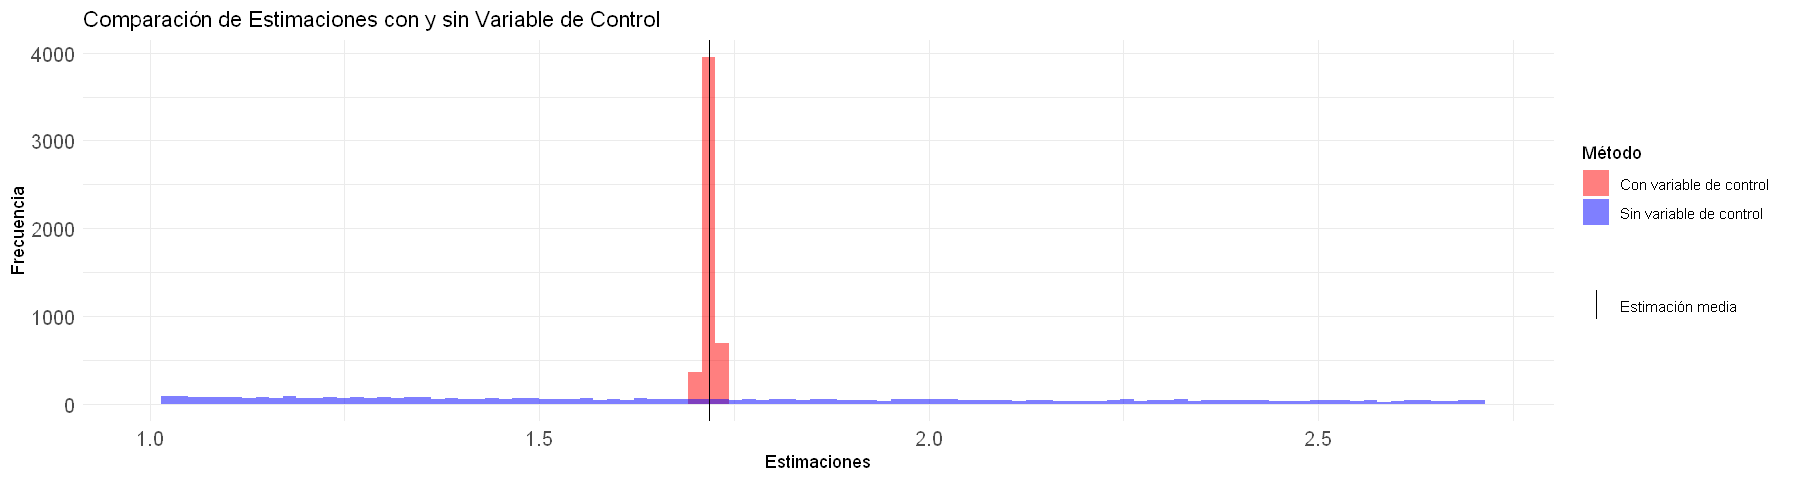

In [ ]:
# Crear el gráfico combinado
plot_1 <- ggplot(combined_data, aes(x = estimates, fill = Método)) +
  geom_histogram(alpha = 0.5, position = "identity", bins = 100) +
  geom_vline(aes(xintercept = mean(theta_hat_values[, 1]), color = "Estimación media"), linetype = "solid") +
  labs(x = "Estimaciones", y = "Frecuencia",
       title = "Comparación de Estimaciones con y sin Variable de Control") +
  scale_fill_manual(values = c("Sin variable de control" = alpha("blue", 0.5),
"Con variable de control" = alpha("red", 0.5))) +
  scale_color_manual(values = c("Estimación media" = "black"), guide = guide_legend("")) +
  xlim(rango) +
  theme_minimal() +
  theme(axis.text = element_text(size = 12))

# Muestra el gráfico combinado
print(plot_1)

### Utilizando $Z^{*}$

En este segundo ejemplo, calcularemos la integral $\int_{0}^{1} \ln (\frac{x^{2}+1}{x+2})dx$ mediante una simulación de Monte Carlo simple, es decir, sin variables de control, y luego una simulación con variable de control, similar al ejercicio anterior, pero esta vez calculando el valor de $Z^{*}$. Posteriormente, calcularemos el porcentaje de reducción de la varianza:

In [ ]:
# Número de muestras
n = 10000

# Vector de valores aleatorios generados uniformemente
x = runif(n)

# Función a integrar
X = function(x){log(x^2+1) / (x+2)}

En este caso utilizaremos como variable de control $Y=f(x)=x$, y comprobaremos su correlación con la función a integrar:

In [ ]:
# Variable de control
Y = function(x){x}

In [ ]:
# Correlación
cor(Y(x), X(x))

[1] 0.9929783

Podemos observar que la correlación entre $X$ e $Y$ es considerablemente alta, lo que indica que la elección de la variable de control cumplirá con el objetivo de reducir la varianza.

Una vez definidas las funciones, podemos calcular el valor de $c^{*}$ de la siguiente manera:

In [ ]:
# Carcular c*
c_star = - cov(X(x), Y(x)) / var(Y(x))
c_star

[1] -0.2513973

A continuación, definiremos tres funciones que nos ayudarán a resolver este ejercicio. La primera es la función de estimación de Monte Carlo simple, la segunda es la estimación de Monte Carlo utilizando la técnica de variable de control y la última es una función para calcular el valor esperado de una función con distribución de probabilidad uniforme:



In [ ]:
#Estimación simple Monte Carlo
MC_simple = function(n)
{
    x=runif(n)
    fx = X(x)
    return(mean(fx))
}

In [ ]:
#Estimación Monte Carlo con variable de control (Z*)
MC_VC = function(n)
{
    x = runif(n)
    Z_star = mean(X(x)) + c_star * (mean(Y(x)) - E_f_unif)
    return(Z_star)
}

In [ ]:
# Valor esperado de una función con pdf uniforme
E_F.unif <- function(funcion, intervalo_inf, intervalo_sup) {
  pdf_uniforme <- function(x) dunif(x, intervalo_inf, intervalo_sup)
  esperanza <- integrate(function(x) {
    funcion(x) * pdf_uniforme(x) }, intervalo_inf, intervalo_sup)$value
  return(esperanza)
}

Calculamos el valor esperado de $Y$. Posteriormente, generamos las estimaciones de Monte Carlo de ambos métodos:

In [ ]:
E_f_unif <- E_F.unif(Y , 0, 1)
cat("E[Y] para la distribución uniforme en [0, 1] es:", E_f_unif)

E[Y] para la distribución uniforme en [0, 1] es: 0.5

In [ ]:
# Número de simulaciones
R <- 5000

#Estimación de MC con ambos metodos
MC_simple.estimates = replicate(R, MC_simple(n))
MC_VC.estimates = replicate(R, MC_VC(n))

In [ ]:
cat("Estimación MC simple:", mean(MC_simple.estimates), "\n")
cat("Varianza de la estimación MC simple:", var(MC_simple.estimates), "\n\n")
cat("Estimación MC con variable de control:", mean(MC_VC.estimates), "\n")
cat("Varianza de la estimación MC con variable de control:", var(MC_VC.estimates))

Estimación MC simple: 0.09719498 
Varianza de la estimación MC simple: 5.367753e-07 

Estimación MC con variable de control: 0.09717428 
Varianza de la estimación MC con variable de control: 7.37468e-09

In [ ]:
cat("Se obtiene una reducción en la varianza de un:", cor(Y(x), X(x))^2 * 100,"%" )

Se obtiene una reducción en la varianza de un: 98.6006 %

En este ejemplo, hemos obtenido una reducción de la varianza de un 98,60% al utilizar una variable de control.

Comparación grafica de las estimaciones:

In [ ]:
# Data frames con las estimaciones
data_simpleMC <- data.frame(estimates = MC_simple.estimates)
data_MC_VC <- data.frame(estimates = MC_VC.estimates)

# Tamaño de la figura
options(repr.plot.width = 15, repr.plot.height = 4)

In [ ]:
# Establecer el rango común para el eje X
rango_comun <- range(c(MC_simple.estimates, MC_VC.estimates))

# Crear un único data frame combinando ambas estimaciones
combined_data_2 <- rbind(data.frame(estimates = data_simpleMC$estimates,
Método = "Sin variable de control"),
                       data.frame(estimates = data_MC_VC$estimates,
                       Método = "Con variable de control"))

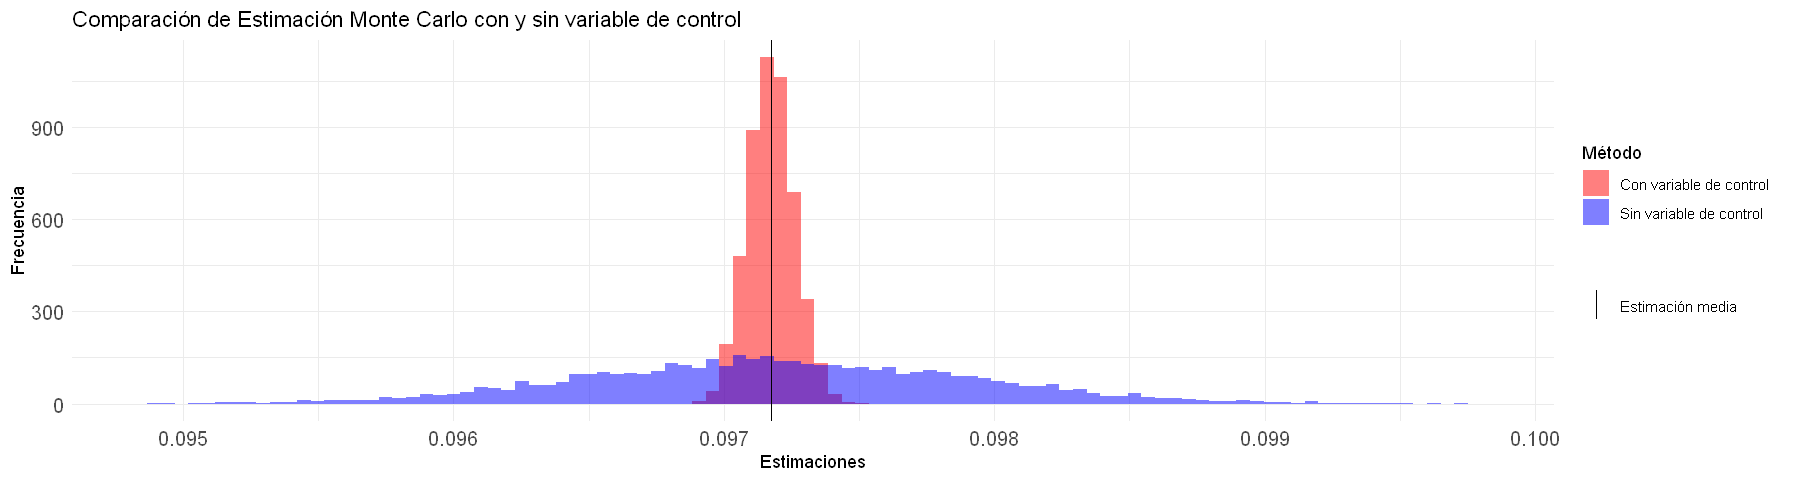

In [ ]:
# Crear el gráfico combinado con línea vertical en la media y asignar nombre a la estética para la leyenda
plot_2 <- ggplot(combined_data_2, aes(x = estimates, fill = Método)) +
  geom_histogram(alpha = 0.5, position = "identity", bins = 100) +
  geom_vline(aes(xintercept = mean(MC_VC.estimates), color = "Estimación media"), linetype = "solid") +
  labs(x = "Estimaciones", y = "Frecuencia",
       title = "Comparación de Estimación Monte Carlo con y sin variable de control") +
  scale_fill_manual(values = c("Sin variable de control" = alpha("blue", 0.5),
                                "Con variable de control" = alpha("red", 0.5))) +
  scale_color_manual(values = c("Estimación media" = "black"), guide = guide_legend("")) +
  xlim(rango_comun) +
  theme_minimal() +
  theme(axis.text = element_text(size = 12))

# Muestra el gráfico combinado
print(plot_2)

---

# Variables antitéticas

 Un método efectivo para lograr el área investigada es el uso de variables antitéticas. Estas variables están negativamente correlacionadas entre si y comparten la misma distribución que la variable $Y$, ofreciendo una forma de reducir la varianza. Además para asegurar la reducción de la varianza se debe de asegurar que la variable aleatoria $Y$ sea monótona.

Este concepto se ve muy claro para casos de estimadores basados en pares de variables aleatorias, $Y_1$ e $Y_2$ que en este caso son antitéticas. Esto significa que la obtención de la segunda muestra, es obtenida a partir de la primera de manera que la correlación entre ellas es negativa haciendo que la varianza disminuya. A parte de reducir la varianza, tambien provoca una reducción significativa en el coste computacional. y con una mayor precisión

Esto solo se aplica a diversas distribuciones como la uniforme, la normal o la exponencial que permiten contrarrestar los valores extremos de las muestras, es decir, una de las ideas principales detrás de las varables antitéticas es crear una relación entre pares de variables aleatorias de manera que cuando una variable tome un valor alto, su contraparte tienda a tomar un valor bajo, y viceversa, reduciendo así la varianza en las estimaciones.


## Demostración matemática

En este apartado se desarrollará matematicamente el beneficio que se obtiene al utilizar las variables antitéticas.

Se quiere estimar una determinada magnitud $θ=E[Y]$. Para ello se generá un número par de muestras aleatorias independientes y distintas con el mismo tamaño (en nuestro caso dos muestras, $Y_1,\ Y_2$) que siguen una distribución uniforme $U(0,1)$ la misma distribución con la que se obtiene $Y$, de los cuales se obtienen el siguiente estimador:
$$
\tilde{θ}=\frac{Y_1+Y_2}{2}
$$ siendo un estimador insesgado de la media, ya que $E[\tilde{θ}]=E[Y_1]=E[Y_2]$.

Este estimador tiene una varianza igual a:
$$Var(\tilde{θ})=\frac{Var(Y_1)+Var(Y_2)+2Cov(Y_1,Y_2)}{4}
$$ donde $Var(Y_1)=Var(Y_2)$, ya que $Y_1$ e $Y_2$ pertenecen a la misma distribución y al ser independientes la $Cov(Y_1,Y_2)=0$, con lo que se nos quedaría en
$$
Var(\tilde{θ})=\frac{Var(Y_1)}{2}
$$

Pero si la $Cov(Y_1,Y_2)<0$, la varianza se vería reducida y es donde entran la importancia de las variables antitéticas.

Para ello, $Y$ debe de ser monótona, porque en el caso de no serlo no se puede asegurar que se reduzca la varianza.

En vez de generar dos muestras aleatorias, se buscará una forma de obtener una segunda muestra que cumpla con $Cov(Y_1,Y_2)<0$ a partir de $Y_1$. Esto se realiza según el caso de las siguientes maneras:

- Si es una distribuciún uniforme, $Y_2=1-Y_1$ lo cual $Y_2∼U(0,1)$
  
- Si es una normal estandar, $Y_2=-Z$

Para estos dos casos (simetría en la distribución de $Y_1$), se cumple que la variable antitética es $Y_2=2\mu-Y_1$ donde $\mu$ es el valor central.

Esto es debido a que la idea principal detrás de las variables antitéticas es crear una relación entre pares de variables aleatorias.

- En caso de que Y no sea simétrica, se recurrirá a la función inversa siempre que sea posible con la distribución de interés $Y$, $Y_1=F^{-1}(U)$ e $Y_2=F^{-1}(1-U)$ para crear la relación comentada anteriormente.

Al obtener la segunda muestra a partir de la primera, realmente en vez de generar $2n$ datos, solo habría que procesar $n$ datos y calcular su pareja (variable antitética) por lo que se reduciría el coste computacional asociado a ello.

Esto último, también afecta en el cálculo de los estimadores, ya que $E[\tilde{θ}]$ pasaría a ser igual a
$$
\frac{1}{N}∑^{N/2}_{k=1}\frac{Y_k+Y^*_k}{2}
$$
 donde N es un número par y es el número de variables aleatorias y donde cada $Y_k\ y\ Y^*_k$ está distribuida como $Y$.
Y el cálculo de su varianza sería igual a
$$
\frac{Var(Y)+Cov(Y,Y^*)}{2N}\ =\ \frac{Var(Y)}{2N}(1+ρ_{YY^*})
$$

En resumen,
$$\frac{Var(Y)+Cov(Y,Y^*)}{2N}<\frac{Var(Y)}{2N}
$$ siendo la izquierda la sección con  variables antitéticas donde tiene un valor de la covarianza negativo y la derecha la sección con covarianza igual a $0$ al ser independientes.

## Demostración experimental

El experimento trata de hacer una comparación de la estimación de la integral
$$
\int^1_0e^x
$$ con y sin el uso de variables antitéticas para comprobar la mejora con su uso utilizando la distribución uniforme. También se calculara el resultado teórico para comparar

Una de las características importantes de $e^x$ para el uso de las variables antitéticas es que es monótona en el rango de 0 a 1 por lo que no habría ningún problema en utilizar esta técnica de manera directa.

Las siguientes celdas de código es el cálculo de los resultados utilizando tanto variables antitéticas como sin utilizarlas y una función para mostrar la distribución de los estimadores de cada método.

In [ ]:
# -------Procedimiento habitual -----
monteCarlo <- function(f,a,b,n,dist){
  if(identical(dist, "uniforme")){
    x <- runif(n,a,b)
    y <- (b-a)*f(x) }
  # Area del estimador
  media_no_anti <- mean(y)
  # Varianza del estimador
  var_no_anti <- var(y)
  #Error del estimador
  error_no_anti <- 2*sd(y) / sqrt(n)
  return(list(variable=y, media=media_no_anti, varianza=var_no_anti, error= error_no_anti))
  }

In [ ]:
# ----Procedimiento variables antitéticas --
antitetica <- function(f,a,b,n,dist){
  n2 <- n %/% 2
  if(identical(dist, "uniforme")){
    x1 <- runif(n2,a,b)
    x2 <- 2*((a+b)/2)-x1
    y1 <- f(x1)*(b-a)
    y2 <- f(x2)*(b-a)
  }
  corr <- cor(y1, y2)
  # Estimador de la media
  y_ant <- 0.5 * (y1 + y2)
  # Media del estimador
  media_ant <- mean(y_ant)
  # Varianza del estimador
  var_ant <- .25*(var(y1)+var(y2)+2*cov(y1,y2))
  #Error del estimador
  error_ant <- 2*sd(y_ant)/sqrt(n) * sqrt(1+corr)
  return (list(variable=y_ant,media=media_ant, varianza=var_ant, error= error_ant))
}

In [ ]:
grafico_disposicion_muestras <- function(y_no_antitetica, y_antitetica, y_antitetica2) {
  # Asegurarse de que ambos vectores tengan la misma longitud
  min_length <- min(length(y_no_antitetica), length(y_antitetica))
  y_no_antitetica <- y_no_antitetica[1:min_length]
  y_antitetica <- y_antitetica[1:min_length]
  # Crear un data frame con tus datos
  if(length(y_antitetica2)==1){
      df <- data.frame(value = c(y_no_antitetica, y_antitetica),group = rep(c("No Antitética", "Antitética"),
         each = min_length))}
  else {df <- data.frame(value = c(y_no_antitetica, y_antitetica,y_antitetica2),group = rep(c("No Antitética",
    "Antitética","Antitetica 2"), each = min_length))}
  # Crear el gráfico con ggplot2
  p <- ggplot(df, aes(x = value, fill = group)) +
    geom_histogram(alpha = 0.5, position = "identity", bins = 100) +
    labs(title = "Comparación de Muestras",
         x = "Valores de y",
         y = "Frecuencia") +
    scale_fill_manual(name = "Métodos", values = c("No Antitética" = alpha("blue", 0.5),
      "Antitética" = alpha("red", 0.5), "Antitetica 2" = alpha("green", 0.3))) +
    theme_minimal() +
    theme()
  options(repr.plot.width = 15, repr.plot.height = 4)
  return(p)
}

### Uniforme


In [ ]:
set.seed(100)
f <- function(x) exp(x)
i_numeric <- integrate(f, 0, 1)$value
n <- 1000
res_montecarlo_uni = monteCarlo(f,0,1,n,"uniforme")
res_antitetica_uni= antitetica(f,0,1,n,"uniforme")

En el siguiente gráfico se muestra la distribución de las muestras evaluadas con la función de densidad $e^x$ en el intervalo [0,1]. En azul se muestra la variable aleatoria $Y_1$ la cual es una uniforme de tamaño $n$, con ella se observa que se distribuye de forma uniforme por todo el intervalo posible de valores que sería igual al espacio [1,e].

Pero con el uso de las variables antitéticas, donde $Y_1=U(0,1)$ e $Y_2=1-U(0,1)$ son un par de variables aleatorias con un tamaño igual a $\frac{n}{2}$. En este caso se observa la idea principal sobre las variables antitéticas, mostrando como las dos variables se distribuyen alrededor del centro, es decir la media, al ser la función de densidad de probabilidad de $Y_1$ sea simétrica. Para un caso más general, que es el que se ha implementado, $Y_2$ se obtendría a partir de $Y_2=2\mu - Y_1$, que con un $U(0,1)$ sería igual al cálculo de antes.

Al multiplicar por $(b−a)$ a la muestra evaluada, se está escalando $f(x)$ para que sea consistente con la amplitud del intervalo. Esto asegura que la contribución de $Y$ en la media sea más representativa.

Esto muestra los efecto del uso de la correlación negativa y como disponen alrededor de un punto central reduciendo la amplitud de las muestras individuales y provocando una reducción en la variación en los resultado que lo que conduce a la vez a estimaciones más precisas utilizando una menor cantidad de muestras.

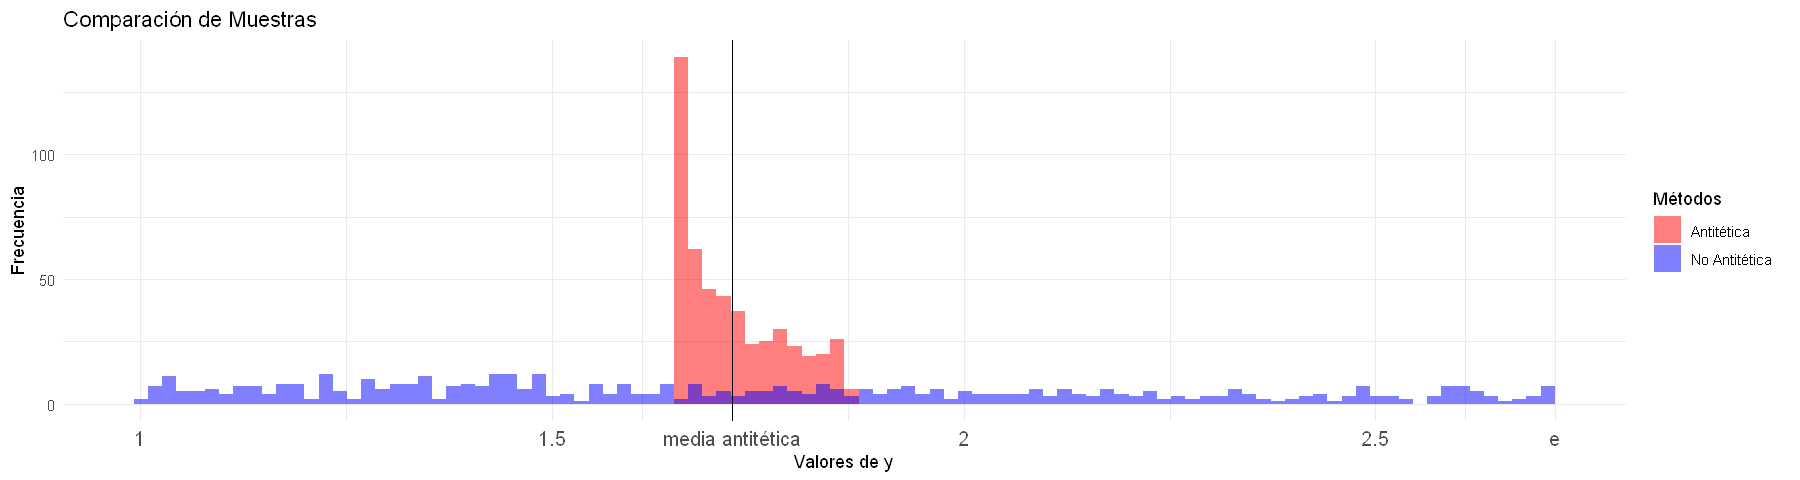

In [ ]:
p <- grafico_disposicion_muestras(res_montecarlo_uni$variable,res_antitetica_uni$variable,0)
p + geom_vline(xintercept = res_antitetica_uni$media, linetype = "solid", color = "black") +
    scale_x_continuous(breaks = c(1, 1.5, res_antitetica_uni$media, 2, 2.5, exp(1)),
        labels = c(1, 1.5, "media antitética", 2, 2.5, "e")) +
    theme(axis.text.x = element_text(size = 12))

En los resultados se observa que el método más preciso en calcular el área de la variable de interés es la técnica de MonteCarlo con la integración de las variables antitéticas.

Tanto la varianza y el error se ve enormemente reducidas con el añadido de las variables antitéticas, en un 99.6% y 99.92% respectivamente, en comparación con el uso del método de MonteCarlo estandar.

Con esta información se ha demostrado el aumento de la precisión y la reducción de la varianza al utilizar las variables antitéticas con un tamaño de muestra menor para el caso de aplicar una distribución uniforme para la variable aleatoria $Y_1$

In [ ]:
data.frame(
  Método = c("Real", "Montecarlo estandar", "Antitéticas"),
  Media = c(i_numeric, res_montecarlo_uni$media, res_antitetica_uni$media),
  Varianza = c(NA, res_montecarlo_uni$varianza, res_antitetica_uni$varianza),
  Error = c(NA, res_montecarlo_uni$error, res_antitetica_uni$error)
)

Método,Media,Varianza,Error
<chr>,<dbl>,<dbl>,<dbl>
Real,1.718282,NA,NA
Montecarlo estandar,1.748434,0.243826498,0.031229889
Antitéticas,1.718744,0.004002141,0.000724398


### Normal Estandar

Este apartado viene añadido en el notebook con la invsestigación entera que se ha hecho, pero debido al límite de páginas se ha decidido eliminar. Pero como conclusión se ha demostrado que se produce una mejora tanto en la preicsión, como en la varianza y el error.

### Exponencial

Este apartado viene añadido en el notebook con la invsestigación entera que se ha hecho, pero debido al límite de páginas se ha decidido eliminar. Pero como conclusión se ha demostrado que se produce una mejora tanto en la preicsión, como en la varianza y el error.

### No monótona


Para el caso de que la función de densidad de la variable de interés que no sea monótona en el intervalo de interés, habrá que tratarlo de una manera diferente. De forma directa no se puede usar este método debido a que se vuelve imposible obtener una correlación positiva, debido a la forma de la variable de interés en un intervalo fijado. La forma para resolver este problema sería dividir por tramos que si sean monótonos y evaluarlos en cada uno. Con el siguiente ejemplo se entenderá mejor.

Para este apartado se va a calcular $\int_{-1}^{1}-x^2+2$. La cual como se observa en la siguiente imagen no es monótona, ya que tiene un punto de inflexión en la posición (0,2).

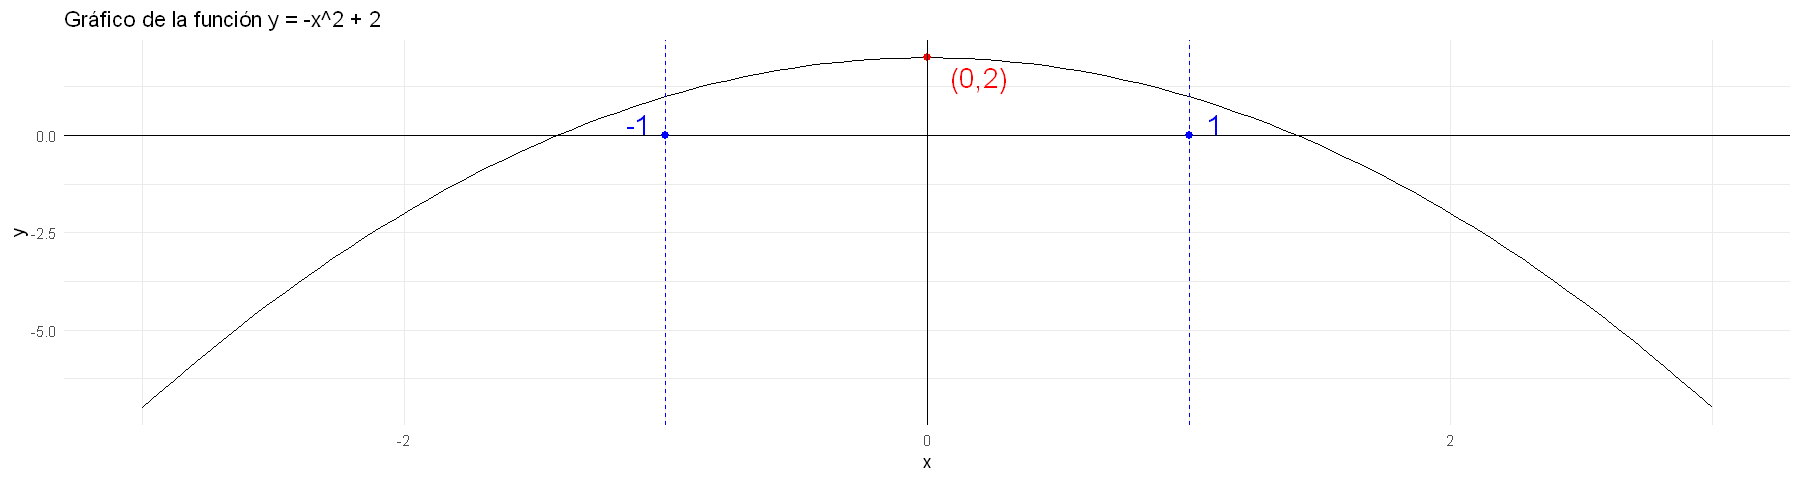

In [ ]:
f <- function(x) -x^2 + 2
x_values <- seq(-3, 3, length.out = 100)
y_values <- f(x_values)
data <- data.frame(x = x_values, y = y_values)
options(repr.plot.width = 15, repr.plot.height = 4)
ggplot(data, aes(x, y)) +
  geom_line() +
  geom_point(x = 0, y = 2, color = "red", size = 2) +
  annotate("text", x = 0.2, y = 1.5, label = "(0,2)", color = "red", size = 6) +
  geom_vline(xintercept = c(-1, 1), linetype = "dashed", color = "blue") +
  geom_vline(xintercept = c(0, 0), linetype = "solid", color = "black") +
  geom_hline(yintercept = 0, linetype = "solid", color = "black") +
  geom_point(x = -1, y = 0, color = "blue", size = 2) +
  geom_point(x = 1, y = 0, color = "blue", size = 2) +
  annotate("text", x = -1.1, y = 0.3, label = "-1", color = "blue", size = 6) +
  annotate("text", x = 1.1, y = 0.3, label = "1", color = "blue", size = 6) +
  labs(title = "Gráfico de la función y = -x^2 + 2",
       x = "x",
       y = "y") +
  theme_minimal()

Ahora se aplica el método de las variables antitéticas y el de MonteCarlo estandar para ver si se produce una mejora y cual obtiene un valor más ajustado al valor real. Para la sección de las variables antitéticas, se ha dividido en el intervalo $[-1,0]$ donde es monótona creciente y [0,1] que es monótona decreciente. Al calcular la media de los estimadores y sumarlas se obtendrá el área total de la función. Luego para el error y la varianza, se hará un promedio de los valores de cada tramo.

In [ ]:
set.seed(100)
f <- function(x) -x^2 + 2
n=1000
i_numeric <- integrate(f, -1, 1)$value
res_montecarlo_no_mon = monteCarlo(f,-1,1,n,"uniforme")
res_antitetica_no_mon_1 = antitetica(f,-1,0,n,"uniforme")
res_antitetica_no_mon_2 = antitetica(f,0,1,n,"uniforme")
media_anti_no_mono = res_antitetica_no_mon_1$media +res_antitetica_no_mon_2$media
varianza_anti_no_mono = (res_antitetica_no_mon_1$varianza + res_antitetica_no_mon_2$varianza) /2
error_anti_no_mono = (res_antitetica_no_mon_1$error + res_antitetica_no_mon_2$error) /2

En el siguiente gráfico se presenta las muestras evaluadas con la media antitética. Se observa que las variables antitéticas se encuentran en torno a la media antitética y por las propiedades de la función de densidad tienen valores parecidos. En cuanto al uso de Monte Carlo estandar, se distribuye de forma uniforme por todos lo valores posibles al evaluarla co una muestra en el intervalo $[-1,1]$.

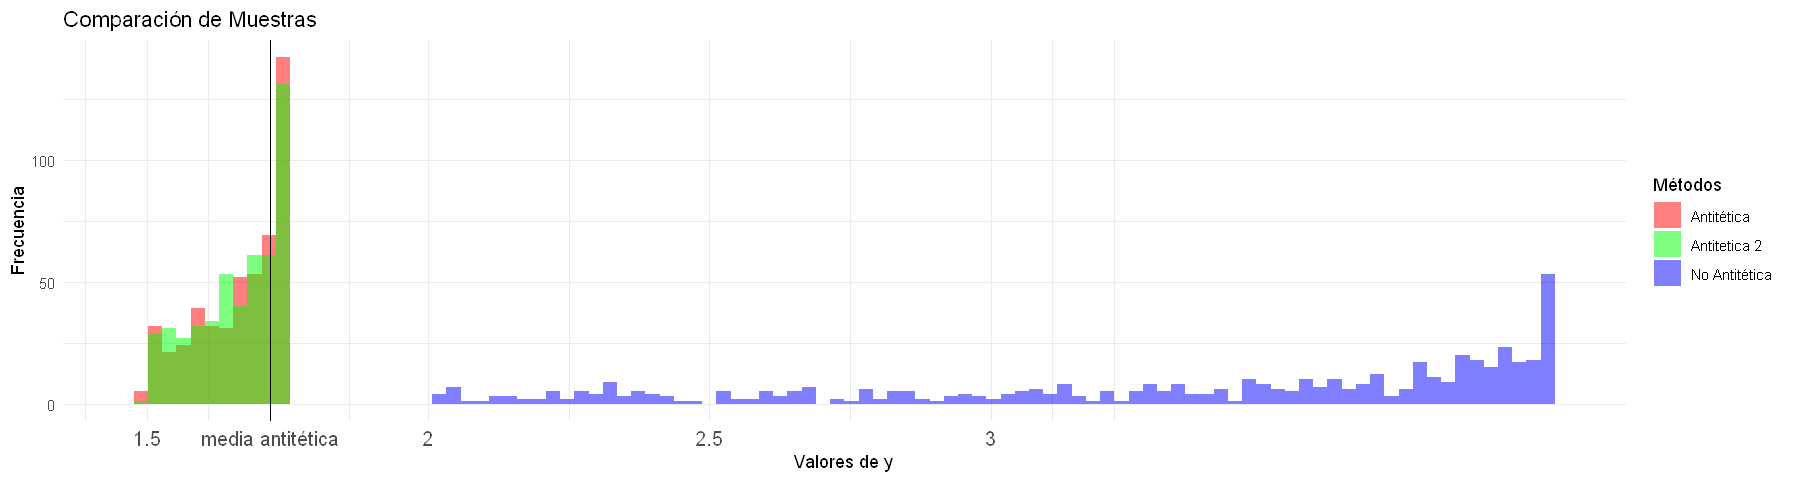

In [ ]:
p <- grafico_disposicion_muestras(res_montecarlo_no_mon$variable,
    res_antitetica_no_mon_1$variable,res_antitetica_no_mon_2$variable)
p + geom_vline(xintercept = res_antitetica_uni$media, linetype = "solid", color = "black") +
    scale_x_continuous(breaks = c(1.5, res_antitetica_uni$media, 2, 2.5, 3),
        labels = c(1.5, "media antitética", 2, 2.5,3)) +
    theme(axis.text.x = element_text(size = 12))

Se sigue observando que el método más preciso en calcular el área de la variable de interés es la técnica con variables antitéticas aplicando la división en intervalos.

Tanto la varianza y el error se ve enormemente reducidas con el añadido de las variables antitéticas, en un 98.47% y 95.67% respectivamente, en comparación con el uso del método de MonteCarlo estandar.

Con esta información se ha demostrado el aumento de la precisión y la reducción de la varianza al utilizar las variables antitéticas. Pero hay una diferencia, ya que para este caso por cada tramo habría que generar un muestra, por lo que no se produce una reducción en el coste computacional asociado a la generación de muestras.

In [ ]:
data.frame(
  Método = c("Real", "Montecarlo estandar", "Antitéticas"),
  Media = c(i_numeric, res_montecarlo_no_mon$media, media_anti_no_mono),
  Varianza = c(NA, res_montecarlo_no_mon$varianza, varianza_anti_no_mono),
  Error = c(NA, res_montecarlo_no_mon$error, error_anti_no_mono)
)

Método,Media,Varianza,Error
<chr>,<dbl>,<dbl>,<dbl>
Real,3.333333,NA,NA
Montecarlo estandar,3.337709,0.364853252,0.038202264
Antitéticas,3.328562,0.005591267,0.001653245


---

# Muestreo estratificado

En ocasiones, cuando analizamos una muestra de la población de interés, ésta exhibe una heterogeneidad o diversidad significativa en relación con las variables de interés. En estos casos, el muestreo aleatorio simple puede no ser eficiente para obtener estimaciones precisas de la población y se pueden dar los siguientes problemas como una elevada varianza y poca precisión, alto sesgo en las estimaciones, riesgo de no representatividad, menor eficiencia de recursos o la falta de control sobre la precisión por estrato.

El muestreo estratificado, en cambio, aborda estos problemas al dividir la población en estratos homogéneos, permitiendo un muestreo más eficiente y representativo de cada subgrupo. Al asignar tamaños de muestra proporcionales a la variabilidad dentro de cada estrato, se consigue una mayor precisión en las estimaciones para toda la población. Además de esto, podemos estimar parámetros de cada uno de los estratos de forma separada dado que cada estrato es una submuestra, lo que nos da una información adicional para enriquecer el análisis de la población general o bien, para realizar inferencias sobre subgrupos.

## Procedimiento general

1. Se divide o segmenta la población completa a analizar en subgrupos o estratos. Los estratos comparten características similares en relación a la variable de interés. La elección de los criterios de estratificación es crucial para asegurar que los estratos sean homogéneos internamente y heterogéneos entre sí. En los próximos apartados comentaremos distintas técnicas de estratificación.

2. Se selecciona una muestra aleatoria simple por cada uno de los estratos.

3. Se calcula el estadístico de interés para la muestra de cada estrato. Las medidas por estrato se ponderan para formar una estimación combinada de la población completa.

## Diseño muestral

La técnica de muestreo estratificado se aplica en problemas de análisis estadístico sobre una muestra de la población $U$ de tamaño $N$.

La muestra se divide en $L$ subgrupos o *estratos* $U_1, \dots, U_L$ cada uno de ellos con $N_1, \dots, N_L$ observaciones tales que:

$$
\sum^L_{h=1} N_h = N
$$

Este proceso de división en estratos se denomina *estratificación*.

Denominamos *ponderación* o *peso* del estrato *h-ésimo* al cociente:

$$
W_h = \frac{N_h}{N}
$$

para todo $h = 1, \dots, L$, teniendo que:

$$
\sum^L_{h=1} W_h = 1
$$

Para cada estrato se toma una muestra $s_h$ de tamaño $n_h$ formada por elementos de $U_h$, así para cada estrato *h* se tiene el diseño muestral $(S_h, P_h(·))$, donde *S* es el espacio muestral:

$$
S = S_1 \times S_2 x \times x S_L
$$

y

$$
s = (s_1, s_2, \dots, s_h) \; \; \forall s \in S
$$

Se denomina *fracción de muestreo* o *tasa de muestreo* del estrato *h-ésimo* al cociente:

$$
f_h = \frac{n_h}{N_h}
$$

### Tipos de muestreo estratificado

El muestreo estratificado es una técnica muy importante en la investigación de muestras que se utiliza para mejorar la eficiencia y precisión de las estimaciones poblacionales al considerar la heterogeneidad presente en una población. En lugar de tratar a la población como un todo, el muestreo estratificado divide la población en subgrupos más homogéneos llamados estratos, de acuerdo con ciertas características relevantes.

Los diferentes métodos para definir los estratos (afijaciones) y para seleccionar las unidades de muestra dentro de cada estrato dan lugar a distintos tipos de muestreo estratificado.

* Muestreo estratificado aleatorio.
* Muestreo estratificado proporcional.
* Muestreo estratificado óptimo.

Nosotros nos centraremos en el muestreo aleatorio estratificado, esto es, dentro de cada estrato la elección de los elementos de la muestra se realiza de manera aleatoria. Por otro lado, se analizarán distintas formas de definir los estratos y cómo influye esto en los estimadores.

### Estimadores en el muestreo aleatorio estratificado

**Estimadores para los estratos**

La relación entre la media de la población y la media de los estratos se define como:

$$
\bar X = \sum_{h=1}^L W_h \bar X_h
$$

donde:

* $\bar X$: Es la media del total de la muestra.
  
* $\sum_{h=1}^{L}$: Es la suma sobre el total de estratos.
* $W_h$: Son los pesos muestrales para cada estrato.
* $\bar X_h$: Es la media muestral para cada estrato.

Por otro lado, a partir del estimador Horvitz-Tompson de $\bar X_h$ se tiene:

$$
\hat{\bar X}_h = \frac{1}{n_h} \sum_{k \in s_h} X_k
$$

donde:

* $\hat{\bar{X}}_h$: Es el estimador de la media muestral para el estrato $h$.
* $\frac{1}{n_h}$: Es la razón empleada para normalizar el estrato.
* $\sum_{k \in S_h}$: Es la suma sobre el total de observaciones del estrato.
* $X_k$: Es la observación $k$ dentro del estrato $h$.

El estimador de la varianza será por tanto:

$$
\hat{V}(\bar X_h) = \frac{1 - f_h}{n_h} \hat{S}_h^2
$$

donde la cuasivarianza muestral es:

$$
\hat{S}_h^2 = \frac{1}{n_h - 1} \sum_{k \in s_h} (X_k - \hat{\bar{X}}_h)^2
$$

**Estimadores de la muestra completa**

El estimador de la media global de la muestra se define como:

$$
\hat{\bar{X}} = \sum_{h=1}^L W_h \hat{\bar{X}}_h = \sum_{h=1}^L \frac{N_h}{N} \hat{\bar{X}}_h
$$

El estimador de la varianza global de la muestra sería:

$$
\hat{V}(\hat{\bar{X}}) = \frac{1}{N^2} \left[ \sum_{h=1}^L \frac{N_h^2 \hat{S}^2_h}{n_h} - \sum_{h=1}^L N_h \hat{S}^2_h \right]
$$

## Tamaño muestral

El tamaño de la muestra es crucial para que los resultados inferidos a partir de la misma se puedan extrapolar a la población. Para que esto sea así, la muestra debe ser representativa y suficiente. Normalmente el tamaño muestral se determina principalmente por el nivel de confianza que se desea tener para la estimación de los parámetros de interés para la población a partir de la muestra.

Cuando conocemos el valor real (o aproximado) de la población total, se puede emplear la fórmula para una población finita. Aquí el tamaño de la muestra se calcula utilizando la fórmula de corrección finita:

$$
n = \frac{{Z_{\alpha}^2 \cdot p \cdot (1-p) \cdot N}}{{E^2 \cdot (N-1) + Z_{\alpha}^2 \cdot p \cdot (1-p)}}
$$

En la vida real es normal que para decidir el tamaño de la muestra se tengan en cuenta también consideraciones prácticas, como el costo, el tiempo y los recursos disponibles.

## Afijación muestral

La afijación muestral es el proceso de asignación de muestras entre los estratos definidos dentro del muestreo estratificado. Aquí los $n$ elementos de la muestra se deben distribuir entre los $L$ estratos atendiendo principalmente por los siguientes factores:

* El peso muestral $W_h$.
* La variabilidad de la variable de estudio para cada estrato $S_h^2$.
* Los costes $c_h$ asociados al muestreo de un elemento para el estrato $h$.

En los siguientes puntos se describen distintos tipos de afijaciones en función de estos factores.

### Afijación uniforme

La afijación uniforme es la más simple de todas, en ella se asigna el mismo número de elementos $r$ a cada estrato:

$$
n_h = r = \frac{n}{L} \; \; \forall h = 1, \dots, L
$$

donde la fracción de muestreo sería:

$$
f_h = \frac{n_h}{N_h}=\frac{r}{N_h}
$$

En la práctica $r$ se aproxima al entero más cercano y se ajusta el tamaño de cada estrato para que el total sea el fijado inicialmente.

### Afijación proporcional

Aquí el tamaño para cada estrato de la muestra es proporcional al tamaño del estrato para toda la población. Obviamente, esto hace necesario conocer esa proporción en la población para poder aplicar esta afijación. Poniendo esto en relación con la fracción de muestreo:

$$
\frac{n_h}{N_h} = \frac{n}{N} \rightarrow f_h = f \; \; \forall h = 1, \dots, L
$$

Los pesos muestrales serían:

$$
W_h = \frac{n_h}{n} = \frac{N_h}{N}
$$

### Afijación óptima

La afijación óptima da más peso a los estratos más heterogéneos (a mayor $S_h^2$, mayor asignación de elementos en la muestra). Esto implica que es necesario conocer o estimar la varianza de la variable de interés para cada estrato. Esta estrategia de afijación permite emplear el coste de muestreo por elemento para cada estrato de forma independiente como restricción dentro del proceso de optimización. La función de coste se define como:

En la afijación óptima, se asignan más elementos a un estrato si:

* El estrato es más grande en proporción dentro de la población.
* La variabilidad del estrato es mayor.
* El coste por muestra del estrato es más barato.

### Afijación de Neyman

La afijación de Neyman es un caso particular de la afijación óptima, donde se asume que los costes de observación para todos los estratos son iguales.

## Muestreo estratificado con R

Se analizarán a continuación las capacidades de muestreo básico que ofrece el lenguaje base R.

Antes de nada configuraremos el entorno cargando las librerías e inicializando la semilla aleatoria para garantizar la reproducibilidad de los resultados.
Establecemos también el ancho y alto para las gráficas a generar.

In [ ]:
set.seed(555)

In [ ]:
options(warn=-1)
options(repr.plot.width = 18, repr.plot.height = 6)

Definimos una función para graficar los histogramas de las muestras con las medias estimadas y los intervalos de confianza para cada afijación (NOTA: a efectos de mejorar la visualización de los valores de interés, el histograma sólo cubrirá el rango [0, 10] para el eje X, o número de personas que habitan una vivienda).

In [ ]:
hist_muestreo <- function(muestra, IC, mediaPoblacion, titulo) {
  tamhog <- muestra$TamHog
  df <- data.frame(tamhog, group = "Muestra")

  ggplot(df, aes(x = tamhog, fill = group)) +
    geom_histogram(alpha = 0.5, breaks = seq(min(tamhog), 10), color = "black") +
    geom_vline(aes(xintercept = IC[2], color = "Límite inferior"), linetype = "dashed") +
    geom_vline(aes(xintercept = IC[1], color = "Media estimada"), linetype = "dashed") +
    geom_vline(aes(xintercept = mediaPoblacion, color = "Media poblacional")) +
    geom_vline(aes(xintercept = IC[3], color = "Límite superior"), linetype = "dashed") +
    labs(title = titulo, x = "# Personas", y = "Frecuencia", fill = "Grupo") +
    theme_minimal() +
    scale_fill_manual(values = alpha("blue", 0.5), name = "Grupo") +
    scale_color_manual(values = c("Límite inferior" = "red", "Media estimada" = "green",
      "Media poblacional" = "black", "Límite superior" = "red"), name = "Leyenda") +
    guides(fill = guide_legend(title = NULL)) +
    scale_x_continuous(breaks = seq(min(tamhog), 10, by = 1))
}

La función *sys.sample* del paquete *SamplingUtil* permite la realización de muestreo sistemático.

A continuación veremos algunos ejemplos de cálculo de tamaño muestral a partir de un porcentaje de error relativo y un nivel de confianza dados. Para ello, haremos uso de la función *nsize()* del paquete *SamplingUtil*.

Pasamos a emplear el dataset ENAHO 2013, que contiene información de una encuesta nacional sobre condiciones de vida y pobreza, realizada por el gobierno de Perú en ese año (https://www.ilo.org/surveyLib/index.php/catalog/7235/related-materials).

La variable de estudio será la cantidad de personas en el hogar (*TamHog*) y se crea una variable (*phu*) que indica si habita una sóla persona (valores 1 ó 0), para calcular la proporción de hogares unipersonales que será empleada más adelante para la afijación proporcional.

In [ ]:
# Creamos un dataframe con datos extraídos de ENAHO 2013
df<- ENAHO2013 %>%  # Creamos un nuevo data frame
  mutate(TamHog=as.numeric(TamHog), # Se convierte TamHog a numérica
         phu=ifelse(TamHog>1,0,1)) %>% # Se crea variable de prop Hog. Unipersonales
  select(FACTOR:ZONA,TamHog,phu,-REGION) %>% # Se toman sólo las variables de interés
  group_by(SEGMENTO,CUESTIONARIO,HOGAR,ZONA) %>% # Se genera esquema de agrupación
  summarise(TamHog=mean(TamHog), # Se calculan variables sumarizadas.
            phu=mean(phu)) %>%
  mutate(id=paste0(SEGMENTO,CUESTIONARIO,HOGAR,ZONA)) # Se genera id único para uso posterior

`summarise()` has grouped output by 'SEGMENTO', 'CUESTIONARIO', 'HOGAR'. You
can override using the `.groups` argument.


### Cálculo del tamaño de la muestra

Calculemos cuál debe ser el tamaño mínimo de la muestra para que el error relativo no supere el 5% con un nivel de confianza del 95% para la variable para el número de habitantes por vivienda.

In [ ]:
# Se calcula el tamaño de muestra a partir del error relativo y
# la confianza de 95%
r <- 0.05
confianza <- 0.95
alpha <- 1 - confianza
nsizeR<- nsize(x=df$TamHog, r=r, alpha=alpha)
nsizeR

$n0
[1] 782

$n_adjust
[1] 731

Podemos ver que el tamaño para la muestra obtenido es de 731 individuos (nos quedamos con el valor ajustado).

### Distribución de la muestra en estratos

**Afijaciones**

Ahora aplicaremos distintas afijaciones para distribuir los elementos de la muestra obtenidos entre los estratos: proporcional, óptima y de Neyman. Para la óptima se considerará un coste de 5 para el muestreo de un individuo en el estrato urbano y 10 para el muestreo de un individuo en el estrato rural.

In [ ]:
# Calculamos las proporciones por estrato de la población
Estratos <- data.frame(df) %>%
  select(ZONA, TamHog) %>%
  group_by(ZONA) %>%
  summarise(n=n(),
    s=sd(TamHog)) %>%
  mutate(p=n/sum(n))

In [ ]:
# Asignamos la muestra proporcional a los estratos con afijación proporcional
nsizeProp <- nstrata(n=nsizeR[[2]], wh=Estratos[,4], method="proportional")
# Afijación óptima de la muestra
ch <- c(5, 10)
nsizeOpt <- nstrata(n=nsizeR[[2]], wh=Estratos[,4], sh=Estratos[,3], ch, method="optimal")
# Afijación de Neyman
nsizeNeyman <- nstrata(n=nsizeR[[2]], wh=Estratos[,4], sh=Estratos[,3], method="neyman")


In [ ]:
salida <- cbind( nsizeProp, nsizeOpt, nsizeNeyman)
colnames(salida) <- c( "Proporcional", "Óptima", "Neyman")
rownames(salida) <- c("Urbano", "Rural")
salida

,Proporcional,Óptima,Neyman
,<dbl>,<dbl>,<dbl>
Urbano,313,461,400
Rural,419,271,332


En la tabla podemos ver cómo quedarían distribuidos los elementos de la muestra atendiendo a cada tipo de afijación.

### Intervalos de confianza

Para la obtención de los intervalos de confianza emplearemos el paquete *DescTools*. Calcularemos el intervalo de confianza para la media del tamaño del hogar (nº de personas en la vivienda) empleando el tamaño muestral obtenido anteriormente, con un nivel de confianza del 95%.

Antes de nada obtenemos la media del total de la población para calcular las desviaciones para cada afijación y luego generamos las muestras para cada afijación atendiendo al número de elementos obtenidos anteriormente.

A partir de ahí obtenemos una estimación para el valor medio del campo TamHog para cada afijación y calculamos sus intervalos de confianza.

In [ ]:
# Generamos un dataframe para la muestra
muestra <- data.frame(df) %>%
  slice_sample(n=nsizeR[[2]], replace=FALSE)

In [ ]:
# Media del total de la población
mediaPoblacion <- mean(df$TamHog)

In [ ]:
# Generamos un dataframe para la muestra en muestreo aleatorio simple
muestra <- data.frame(df) %>%
  slice_sample(n=nsizeR[[2]], replace=FALSE)
ICTamHog <- MeanCI(x=muestra$TamHog, trim=0, conf.level=confianza, na.rm=FALSE)
# Diferencia relativa MAS
difR <- paste0(abs(round((ICTamHog[1] - mediaPoblacion) / mediaPoblacion, 3))*100,"%")

In [ ]:
# Generamos un dataframe para la muestra empleando la afijación proporcional
muestraUrbana1 <- data.frame(df) %>%
  filter(ZONA == "Urbana") %>%
  slice_sample(n=nsizeProp[[1]][1], replace=FALSE)
muestraRural1 <- data.frame(df) %>%
  filter(ZONA == "Rural") %>%
  slice_sample(n=nsizeProp[[1]][2], replace=FALSE)
muestraProp <- rbind(muestraUrbana1, muestraRural1)
ICProp <- MeanCI(x=muestraProp$TamHog, trim=0, conf.level=confianza, na.rm=FALSE)
# Diferencia relativa estratificación proporcional
difRProp <- paste0(abs(round((ICProp[1] - mediaPoblacion) / mediaPoblacion, 3))*100,"%")

In [ ]:
# Generamos un dataframe para la muestra empleando la afijación óptima
muestraUrbana2 <- data.frame(df) %>%
  filter(ZONA == "Urbana") %>%
  slice_sample(n=nsizeOpt[[1]][1], replace=FALSE)
muestraRural2 <- data.frame(df) %>%
  filter(ZONA == "Rural") %>%
  slice_sample(n=nsizeOpt[[1]][2], replace=FALSE)
muestraOpt <- rbind(muestraUrbana2, muestraRural2)
ICOpt <- MeanCI(x=muestraOpt$TamHog, trim=0, conf.level=confianza, na.rm=FALSE)
# Diferencia relativa estratificación óptima
difROpt <- paste0(abs(round((ICOpt[1] - mediaPoblacion) / mediaPoblacion, 3))*100,"%")

In [ ]:
# Generamos un dataframe para la muestra empleando la afijación de Neyman
muestraUrbana3 <- data.frame(df) %>%
  filter(ZONA == "Urbana") %>%
  slice_sample(n=nsizeNeyman[[1]][1], replace=FALSE)
muestraRural3 <- data.frame(df) %>%
  filter(ZONA == "Rural") %>%
  slice_sample(n=nsizeNeyman[[1]][2], replace=FALSE)
muestraNeyman <- rbind(muestraUrbana3, muestraRural3)
ICNeyman <- MeanCI(x=muestraNeyman$TamHog, trim=0, conf.level=confianza, na.rm=FALSE)
# Diferencia relativa estratificación Neyman
difRNeyman<- paste0(abs(round((ICNeyman[1] - mediaPoblacion) / mediaPoblacion, 3))*100,"%")

El indicador que nos permite saber cómo de fiable es una estimación viene dado por los intervalos de confianza.

Vamos a generar una gráfica para comparar los que hemos obtenido hasta el momento.

In [ ]:
media_text <- paste("La media para la población es de ",round(mediaPoblacion,4)," personas por casa")
print(media_text)

salida <- cbind(ICTamHog, ICProp, ICOpt, ICNeyman)
colnames(salida) <- c("MAS", "Proporcional", "Óptima", "Neyman")
rownames(salida) <- c("Media", "L. inferior", "L. superior")
salida

[1] "La media para la población es de  3.5471  personas por casa"


,MAS,Proporcional,Óptima,Neyman
Media,3.528044,3.538934,3.615437,3.452368
L. inferior,3.359948,3.366550,3.379734,3.303421
L. superior,3.696140,3.711319,3.851140,3.601315


In [ ]:
ISize <- ICTamHog[3] - ICTamHog[2]
ISizeProp<- ICProp[3] - ICProp[2]
ISizeOpt <- ICOpt[3] - ICOpt[2]
ISizeNeyman <- ICNeyman[3] - ICNeyman[2]

Generamos el histograma para muestra obtenida a partir del muestreo estratificado con afijación de Neyman (la que ofrece un intervalo de confianza más ajustado). Podemos ver que el valor real de la media muestral (línea vertical negra) se encuentra dentro del intervalo de confianza y que el valor estimado (línea verde discontinua) se encuentra bastante próximo al valor real.

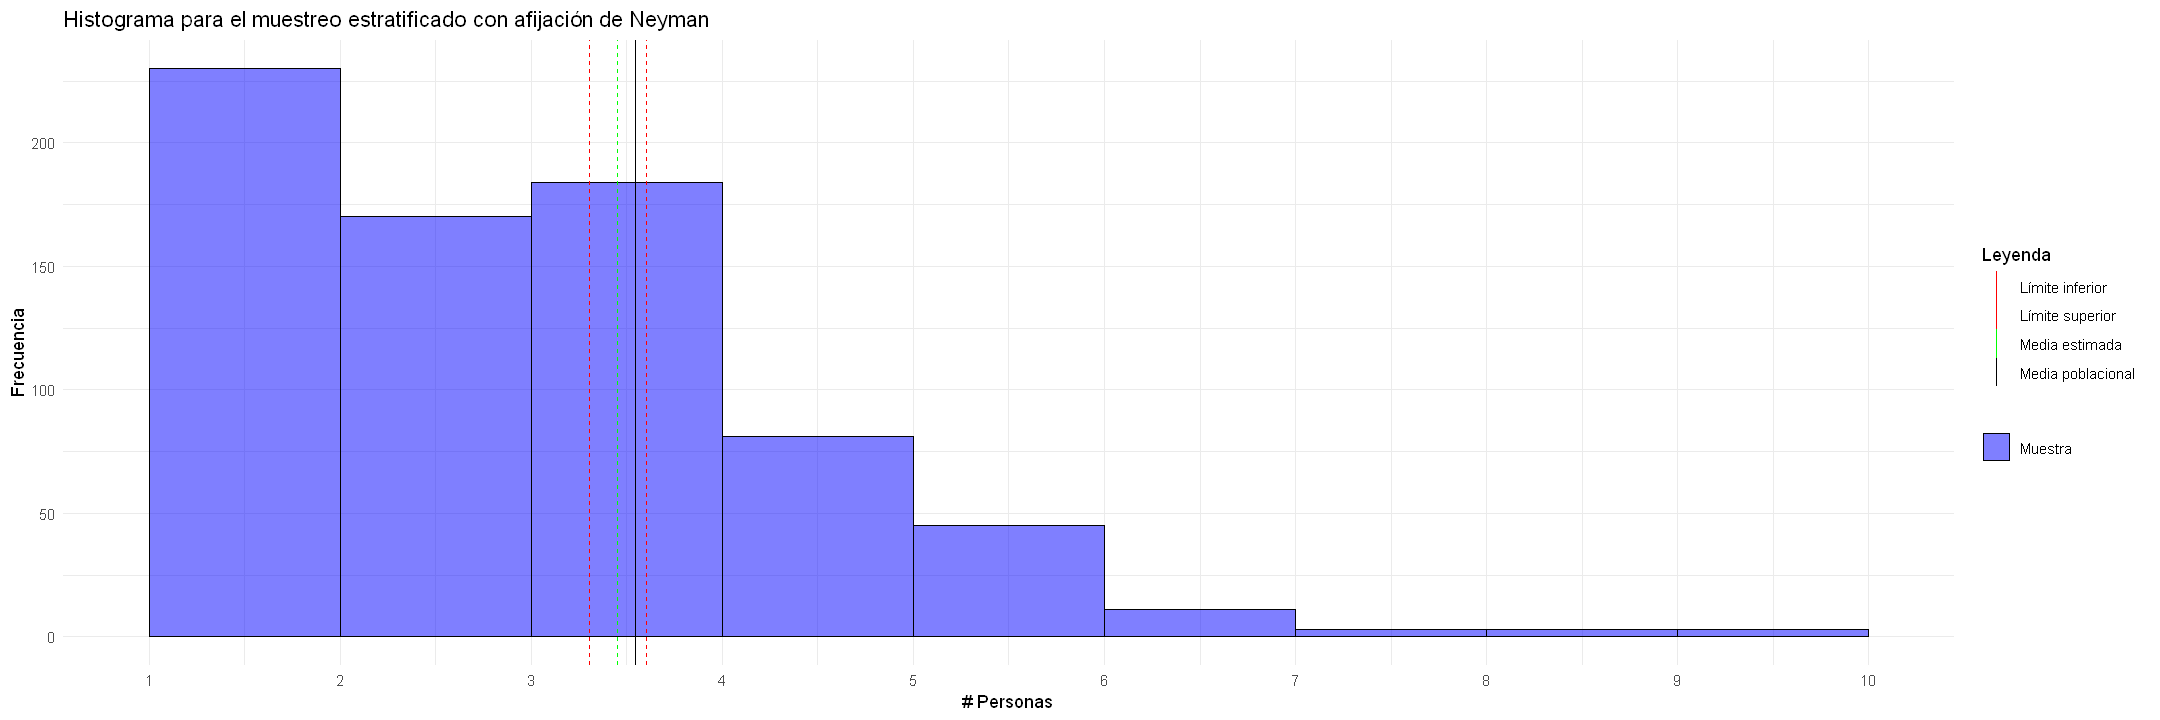

In [ ]:
hist_muestreo(muestraNeyman, ICNeyman, mediaPoblacion, "Histograma para el muestreo estratificado con afijación de Neyman")

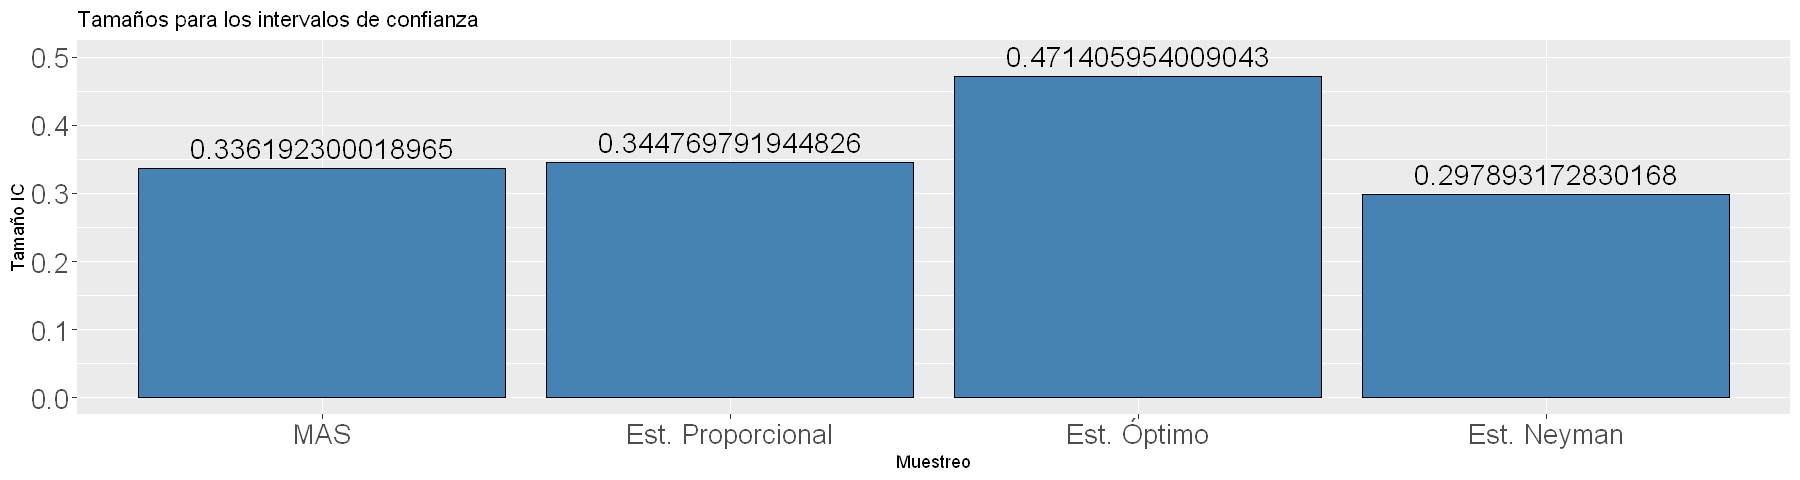

In [ ]:
values <- c(ISize, ISizeProp, ISizeOpt, ISizeNeyman)
names <- c("MAS", "Est. Proporcional", "Est. Óptimo", "Est. Neyman")
options(repr.plot.width = 15, repr.plot.height = 4)
ggplot(data.frame(values, names), aes(x = factor(names, levels = names), y = values)) +
  geom_col(fill = "steelblue", color = "black") +
  geom_text(aes(label = values), vjust = -0.5, size = 6, color = "black") +
  labs(y = "Tamaño IC", x = "Muestreo", title = "Tamaños para los intervalos de confianza") +
  theme(axis.text.x = element_text(size = 16), axis.text.y = element_text(size = 16)) +
  ylim(0, 0.5)

Como se puede apreciar comparando el tamaño de los intervalos de confianza para los distintos tipos de muestreo, el mayor se corresponde con el del muestreo estratificado óptimo, mientras que el mejor (el más pequeño) sería el correspondiente a la estimación estratificada de Neyman.

Claramente la afijación óptima da el peor resultado para los intervalos de confianza porque en su caso tiene que optimizar también los costes del muestreo, factor que no se tiene en cuenta en los demás muestreos estratificados.

Parece raro que el IC sea mayor para el muestreo estratificado óptimo que para el muestreo aleatorio simple, pero esto es así porque no siempre siempre se reduce la varianza al pasar del muestreo aleatorio simple a uno estratificado. Recordemos que la estratificación introduce una varianza adicional a la varianza total de la estimación que no siempre se ve compensada con la reducción de la varianza que se obtiene en la estratificación. La efectividad del muestreo estratificado en comparación con el muestreo aleatorio simple depende de varios factores, incluidas las variabilidades dentro de y entre los estratos.

El muestreo aleatorio simple puede ser más eficiente si la variabilidad en la población no está fuertemente estructurada por características específicas que justifiquen la estratificación, o si se elige una estratificación o una afijación no adecuada.